

## Demo - Working with Events

### Calculate Probabilities of finding desired rooms on *Airbnb*

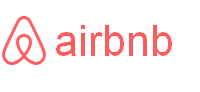

*__Airbnb__* is an American online vacation-place rental company. It offers services such as lodging, homestays and other tourism services. It has become very popular in recent times due to its cheaper rental options.

A Travel Agent assists customers to book rooms on Airbnb with a small commission. The agent has to constatntly keep track of the availability of rooms and recommend appropriate options to customers.

Let us see how the avaialbility of rooms in different cities can be analyzed using *Probability*.

### Import Required Libraries

In [1]:
import pandas as pd

### Load and understand Airbnb Data

In [2]:
#load the data from CSV file
df = pd.read_csv("airbnb_data.csv")
df.head()

,id,name,room_type,price,minimum_nights,number_of_reviews,city
0,3781,HARBORSIDE-Walk to subway,Apartment,146,28,16,Boston
1,5506,**$49 Special ** Private! Minutes to center!,Apartment,145,3,107,Boston
2,6695,$99 Special!! Home Away! Condo,Apartment,169,3,115,Boston
3,10730,Bright 1bed facing Golden Dome,Apartment,85,91,32,Boston
4,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",Apartment,87,28,10,Boston


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32348 entries, 0 to 32347
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 32348 non-null  int64 
 1   name               32348 non-null  object
 2   room_type          32348 non-null  object
 3   price              32348 non-null  int64 
 4   minimum_nights     32348 non-null  int64 
 5   number_of_reviews  32348 non-null  int64 
 6   city               32348 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.7+ MB


In [4]:
#check for rows with null values
df.isnull().any()

id                   False
name                 False
room_type            False
price                False
minimum_nights       False
number_of_reviews    False
city                 False
dtype: bool

#### There are no null values in this data set.

In [5]:
#check different cities
df.city.value_counts()

city
Hawaii     22434
Seattle     6575
Boston      3339
Name: count, dtype: int64

#### Data of rooms in three cities, Boston, Hawaii and Seattle, is provided.

In [6]:
#check different types of rooms
df.room_type.value_counts()

room_type
Apartment    27241
Private       4660
HotelRoom      272
Shared         175
Name: count, dtype: int64

#### Rooms of types Apartment, Private, Hotel Room and Shared are available.

#### Q. What is the probability of finding a room in each of the available cities?

First, let us calculate the size of the *__Sample Space__*.
Since there are no null values and id column has no repeated values, this column can be used to get the size of Sample Space.

In [7]:
#sample space of Airbnb Data
ss_ab = df.id.count()
ss_ab

32348

In [8]:
#Available cities
df.city.value_counts()

city
Hawaii     22434
Seattle     6575
Boston      3339
Name: count, dtype: int64

Let *bos* be the event of finding a room in Boston.
The number of favorable outcomes can be calculated as follows:

In [9]:
#number of rooms in Boston
series1 = df.apply(lambda x: True if x['city'] == 'Boston' else False , axis=1)
bos = len(series1[series1 == True].index)
bos

3339

In [10]:
#probability of finding a room in Boston
p_bos = round(bos/ss_ab,3)
p_bos

0.103

In [11]:
3339/32348

0.10322121924075676

In [12]:
#number of roms in Hawaii
series2 = df.apply(lambda x: True if x['city'] == 'Hawaii' else False , axis=1)
haw = len(series2[series2 == True].index)
haw

22434

In [13]:
#probability of finding a room in Hawaii
p_haw = round(haw/ss_ab,3)
p_haw

0.694

In [14]:
#number of rooms in Seattle
series3 = df.apply(lambda x: True if x['city'] == 'Seattle' else False , axis=1)
sea = len(series3[series3 == True].index)
sea

6575

In [15]:
#probability of finding a room in Seattle
p_sea = round(sea/ss_ab,3)
p_sea

0.203

In [16]:
p_bos + p_haw + p_sea

1.0

### Inference:

1. It can be deduced from the data that these three events are *__Mututally Exclusive__* as no two events can happen at the same time.

2. Probabilities of finding rooms in different cities (*__Marginal Probabilities__*) are as follows:
    Boston: 0.103
    Hawaii: 0.694
    Seattle: 0.203

2. Hawaii has the highest probability of finding a room. This is inline with the count of rooms calculated in the previous step.

3. The sum of all three probabilities is 1. Thus these three are *__All Inclusive Events__*. Their union comprise the entire *__Sample Space__*.


#### Q. Calculate the Probability of finding a room either in Boston or Hawaii.

#### From the inference of previous step, we know that the two events of *__"Finding a room in Boston"__* and *__"Finding a room in Hawaii"__* are *__Mutually Exclusive__*. Thus the probability of their __Union__ can be calculated by simply adding the individual probabilities.

#### Calculate Union

In [17]:
p_bosORhaw = p_bos + p_haw
p_bosORhaw

0.7969999999999999

### Inference:

Probability of finding a room either in Boston or Hawaii is 0.797.

#### Q. Calculate the Probability of finding a room in Boston or an Apartment.

Check if the two events are *__Disjoint__* or not.

In [18]:
#number of Apartments in Boston
n_apt_bos = df[(df['room_type']=='Apartment') & (df['city'] =='Boston')].count()['id']
n_apt_bos

2163

The intersection of the two events *__"Finding an Apartment"__* and *__"Finding a room in Boston"__* is not 0. Hence these events are **Joint Events**.

In [19]:
#probability of finding a room in Boston
p_bos

0.103

In [20]:
#number of Apartment type rooms
series4 = df.apply(lambda x: True if x['room_type'] == 'Apartment' else False , axis=1)
apts = len(series4[series4 == True].index)
apts

27241

In [21]:
#probability of finding an Apartment
p_apt = round(apts/ss_ab,3)
p_apt

0.842

In [22]:
#probability of finding an Apartment in Boston
p_aptANDbos = round(n_apt_bos/ss_ab, 3)
p_aptANDbos

0.067

#### Apply Addition Rule

In [23]:
p_bosORapt = p_bos + p_apt - p_aptANDbos
p_bosORapt

0.8779999999999999

### Inference:

1. Probability of finding a room in Boston or an Apartment is 0.878.

2. The two events are Joint. Hence the probability of either one of them happening is calculated using the *Addition Rule.*

#### Q. Calculate the probability of finding a room in *Seattle* of type *Private*.

Check if the events are *Disjoint*.

In [24]:
#number of Private rooms in Seattle
n_pvt_sea = df[(df['room_type']=='Private') & (df['city'] =='Seattle')].count()['id']
n_pvt_sea

1399

#### The two events _"Finding a room in Seattle"_ and _"Finding a Private room"_ are not Disjoint. Hence their intersection is not 0.

In [25]:
#probability of finding a Private room in Seattle
p_pvtANDsea = round(n_pvt_sea/ss_ab,3)
p_pvtANDsea

0.043

### Inference:

1. Probability of finding a Private room in Seattle is very low: 0.043.